# Final project (Group 3)
This is the main notebook for the final project 

### Loading all necessary packages and dependencies:

In [1]:
import mapFunctions as mf
import plotFunctions as pf
import routingFunctions as rf
import pandas as pd
import osmnx as ox


### Create some test data

In [2]:
test_data = {'name': ['Calisthenic Park Salzach', 'Calisthenic Park Alpenstraße', 'Beach Volleyball Donnenbergpark',
                      'Table tennis Donnenbergpark', 'Beach Volleyball Volksgarten', 'Kleiner Barmstein'],
             'coordinates': [[47.80405845892574, 13.037556651700381], [47.777922927461255, 13.064586591558372], 
                             [47.788193993458634, 13.043390741193457], [47.788262158184, 13.043052179790253],
                             [47.79640310970255, 13.060316436052583], [47.68887536167374, 13.078379431299568]],
             'sport_type': ['Calisthenics', 'Calisthenics', 'Beach-Volleyball', 'Table-Tennis', 'Beach-Volleyball', 'Climbing'],
             'description': ['Nice training area with shadow in the afternoon', 
                             'Nice training area with sun all day long',
                             'Nice beachvolleyball field close to Almkanal where you can jump in after your match',
                             '2 Table-Tennis tables',
                             '2 Beach-Volleyball fields perfect for tournaments',
                             'Sport climbing area with routes between grade 6b and 8b']}
test_data_df = pd.DataFrame(test_data)
#test_data_df

Create a dicitionry where you get the coordinates (values) from the names of the locations (key)

In [3]:
test_data_dict = test_data_df.set_index('name')['coordinates'].to_dict()
#test_data_dict

### Create the Map

First we want to know where our data points are located. Therefor the center coordinates are calculated as the mean of all our data-coordinates.

In [4]:
centerCoord = mf.getCenterCoordinates(test_data_df['coordinates'])
centerCoord

[47.77395266823432, 13.054547005265768]

In this step the basemap is created where the mean coordinates between all outdoor-activity locations are the center of the map:

In [49]:
mymap = mf.create_Map(centerCoord, zoom_start=11)

After that all data points are added to the map with the different icons depending on the sport type you can do at each location:

In [50]:
pf.add_all_points(mymap, test_data_df)

In [56]:
locations = []
for row in range(0,len(test_data_df)):
    locations.append(tuple(test_data_df["coordinates"][row]))

locations



[(47.80405845892574, 13.037556651700381),
 (47.777922927461255, 13.064586591558372),
 (47.788193993458634, 13.043390741193457),
 (47.788262158184, 13.043052179790253),
 (47.79640310970255, 13.060316436052583),
 (47.68887536167374, 13.078379431299568)]

## Routing
At first I can set starting coordinates from where I want to head to one of our locations. You can either do that by using the user defined function or just assign the starting coordinates to the variable start_coords.

In [7]:
start_coords = rf.starting_coord_by_user()
#start_coords = [47.75057145773912, 12.994800955174183]
#start_coords

[47.75057145773912, 12.994800955174183]

For the coordinates of the destination you can use the dictionary that we created above where the name of the location is the key:

In [16]:
def get_location_of(name):
    return test_data_dict[name]

In [17]:
end_coords = get_location_of('Kleiner Barmstein')
end_coords

[47.68887536167374, 13.078379431299568]

In order to calculate routes between our points we first have to download the underlying graphs. OSMnx offers different graphs depending on your mode of moving from A to B. You can select between 'all', 'bike', 'walk' and 'drive'. Depending on that different edges are contained in the graphs. In this step we download the graphs of all types in a radius of 15km around our calculated center coordinates.

In [9]:
#download the OSM network around our center coordinates with 15km radius
# this can take a couple of minutes
# set radius:
radius = 15000 

#different types: 'all', 'bike', 'drive', 'walk',  
# all
#graph_all = ox.graph_from_point(tuple(centerCoord), dist = radius, network_type='all')
# bike
#graph_bike = ox.graph_from_point(tuple(centerCoord), dist = radius, network_type='bike')
# walk
#graph_walk = ox.graph_from_point(tuple(centerCoord), dist = radius, network_type='walk')
# drive
graph_drive = ox.graph_from_point(tuple(centerCoord), dist = radius, network_type='drive')

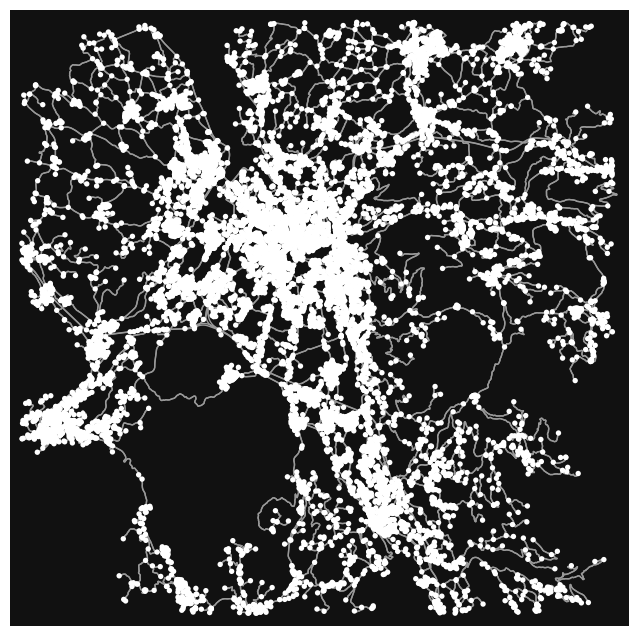

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [10]:
# visualize the graph (drive graph as an example)
ox.plot.plot_graph(graph_drive)

Finally, we can calculate a route. In this function we have to specify the map on which we want to plot the route, the starting and end-coordinates and the graph-type. If we want to walk, drive or bike or just get the shortest way of all. Additionally, the function also calculates the length of the route and prints it out.

In [11]:
rf.calculate_route(map = mymap, start_coords=start_coords, end_coords=end_coords, graph_type=graph_drive)

The length of your route is  12.63 km
